In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import unidecode
from textblob import TextBlob
pd.set_option('display.max_rows',None)

import pickle
import pyLDAvis.sklearn
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

import string
import re
import nltk
# nltk.download('stopwords') # remove words such as 'I', 'the', 'as', 'am' etc..
from nltk.corpus import stopwords

PUNCT_TO_REMOVE = string.punctuation # example of punctuation: '', ;, :, (), etc...

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.chdir('/Users/Ethan/Downloads/project/DataFolder')

In [3]:
os.listdir()

['bpd2016data.xlsx',
 '2015_bpd_label_data_sanket.xlsx',
 'BPD 2017 LABEL DATA.xlsx',
 'BPD 2019 Label Data.xlsx',
 '2014_bpd_label_data_sanket.xlsx',
 'BPD 1.xlsx',
 'BPD 2.xlsx',
 'bpd2018labeldata.xlsx',
 '.ipynb_checkpoints',
 'bpd2016labeldata.xlsx',
 'bpd2018data.xlsx',
 'BPD 2019 Feature Data.xlsx',
 'BPD 2017 DATA.xlsx']

In [4]:
files = os.listdir()[0:8] + os.listdir()[9:]
files

['bpd2016data.xlsx',
 '2015_bpd_label_data_sanket.xlsx',
 'BPD 2017 LABEL DATA.xlsx',
 'BPD 2019 Label Data.xlsx',
 '2014_bpd_label_data_sanket.xlsx',
 'BPD 1.xlsx',
 'BPD 2.xlsx',
 'bpd2018labeldata.xlsx',
 'bpd2016labeldata.xlsx',
 'bpd2018data.xlsx',
 'BPD 2019 Feature Data.xlsx',
 'BPD 2017 DATA.xlsx']

In [5]:
df = pd.DataFrame()
for file in files:
    bpd = pd.read_excel(file, engine='openpyxl')
    if 'label' not in list(bpd.columns):
        bpd['label'] = 'NULL'
    df = pd.concat([df,bpd],axis=0).reset_index(drop=True)
df.shape

(15791, 10)

In [6]:
df[df['label']=='label']

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,Unnamed: 8,Unnamed: 9
3324,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
3435,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
3553,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
3674,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
3800,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
3912,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
4024,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
4144,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
4292,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN
4393,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,NaN,NaN


Removing above unwanted records from the data

In [7]:
df = df[df['label']!='label'].reset_index(drop=True)
df.shape

(15749, 10)

In [8]:
for i in df['username'].unique().astype(str):
    if 'username' in i:
        print(i)

username


In [9]:
df[df['username']=='username']

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,Unnamed: 8,Unnamed: 9
100,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
201,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
302,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
403,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
504,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
605,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
706,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
807,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
908,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN
9191,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,NULL,NaN,NaN


In [10]:
df.drop(columns=['Unnamed: 8', 'Unnamed: 9'], inplace=True)

In [11]:
df.columns

Index(['username', 'tweet', 'username_of_retweeter', 'hashtag',
       'tweet created', 'number of followers', '# following', 'label'],
      dtype='object')

In [12]:
df = df[df['username']!='username'].reset_index(drop=True)
df.shape

(15708, 8)

In [13]:
for i in df.columns:
    df = df[pd.notnull(df[i])]
    print(df.shape)

(13435, 8)
(13368, 8)
(13223, 8)
(13221, 8)
(13221, 8)
(13221, 8)
(13221, 8)
(13114, 8)


# Checking missing values

In [14]:
df.isnull().sum()

username                 0
tweet                    0
username_of_retweeter    0
hashtag                  0
tweet created            0
number of followers      0
# following              0
label                    0
dtype: int64

- Seems like there is no missing value
- But some having values like this

In [15]:
df[df['label']=='[]'].sample(3)

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label
12272,Then_TheresMe,he's bipolar like you were just so hurt amd be...,no retweet username,[],2016-09-22 18:12:21+00:00,821,1313,[]
11227,IllumRecovery,are you or someone you know in need of informa...,no retweet username,[],2018-02-28 16:56:48+00:00,161,216,[]
11754,en_eye_ayy,women who have not been diagnosed with bipolar...,no retweet username,[],2016-04-22 14:16:20+00:00,1488,387,[]


In [16]:
df[df['hashtag']=='[]'].sample(3)

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label
5484,stokes_maddy,i looked happy the day before i tried end my l...,selfloveliv,[],2019-03-05 10:38:58+00:00,35,111,"['got diagnosed', 'diagnosed with', 'i got dia..."
12268,ArabianTherapy,what i am not i am not rich i am not popular i...,BipolarPhotos,[],2016-09-22 22:08:11+00:00,190,274,"['i am not', 'i am not', 'i am not', 'i am not..."
10710,alexamurdock34,got put on medications for my mood swings ðŸ¤¦...,IzJooooo22,[],2018-07-31 17:55:37+00:00,120,235,"['getting diagnosed', 'diagnosed with', 'diagn..."


In [17]:
df[df['label']=='NULL'].sample(3)

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label
13943,RevaDinaAsri,"having a mental illness helps me to be free, t...",magdaleneid,[],2019-09-05 01:38:27+00:00,170,251,NULL
14549,wonderlinksJP,ã€æœ‰æ–™è©¦é£²ä¼šã€‘2æœˆ9æ—¥18æ™‚ã‚ˆã‚Šjræ°´é...,no retweet username,[],2019-02-04 22:53:33+00:00,1824,1086,NULL
9965,ahangari_mel,b'they are fancy words the same way stigma is ...,bazzapower,[],2020-09-01 05:51:23+00:00,665,1923,NULL


In [18]:
for col in df.columns:
    try:
        print(col,"--",df[df[col]=='NULL'].shape[0]+df[df[col]=='[]'].shape[0]+df[df[col]=='no retweet username'].shape[0])
        print("")
    except:pass

username -- 0

tweet -- 0

username_of_retweeter -- 7828

hashtag -- 10476

tweet created -- 5

number of followers -- 5

# following -- 0

label -- 9450



- Replacing null with unknown

In [19]:
df['username_of_retweeter'] = df['username_of_retweeter'].replace(['no retweet username','Unknown'])
df['hashtag'] = df['hashtag'].replace(['[]','Unknown'])
df['hashtag'] = df['hashtag'].replace(['NULL','Unknown'])
df['label'] = df['label'].replace(['[]','Unknown'])
df['label'] = df['label'].replace(['NULL','Unknown'])
df['number of followers'] = df['number of followers'].replace(['NULL','Unknown'])
df['number of followers'] = df['number of followers'].replace(['[]','Unknown'])
df['tweet created'] = df['tweet created'].replace(['NULL','Unknown'])
df['tweet created'] = df['tweet created'].replace(['[]','Unknown'])

In [20]:
for col in df.columns:
    try:
        print(col,"--",df[df[col]=='NULL'].shape[0]+df[df[col]=='[]'].shape[0]+df[df[col]=='no retweet username'].shape[0])
        print("")
    except:pass

username -- 0

tweet -- 0

username_of_retweeter -- 9

hashtag -- 37

tweet created -- 2

number of followers -- 0

# following -- 0

label -- 1019



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13114 entries, 0 to 15707
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               13114 non-null  object
 1   tweet                  13114 non-null  object
 2   username_of_retweeter  13114 non-null  object
 3   hashtag                13114 non-null  object
 4   tweet created          13114 non-null  object
 5   number of followers    13114 non-null  object
 6   # following            13114 non-null  object
 7   label                  13114 non-null  object
dtypes: object(8)
memory usage: 922.1+ KB


In [22]:
df = df.reset_index(drop = True)

- number of followers & # following must have numerical data type

In [23]:
for i in range(0,len(df['# following'])):
    if type(df['# following'][i]) != int:
        df = df.drop(i)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10909 entries, 0 to 13113
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               10909 non-null  object
 1   tweet                  10909 non-null  object
 2   username_of_retweeter  10909 non-null  object
 3   hashtag                10909 non-null  object
 4   tweet created          10909 non-null  object
 5   number of followers    10909 non-null  object
 6   # following            10909 non-null  object
 7   label                  10909 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


In [24]:
df = df.reset_index(drop = True)

In [25]:
for i in range(0,len(df['number of followers'])):
    if type(df['number of followers'][i]) != int:
        df = df.drop(i)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 0 to 10908
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               10906 non-null  object
 1   tweet                  10906 non-null  object
 2   username_of_retweeter  10906 non-null  object
 3   hashtag                10906 non-null  object
 4   tweet created          10906 non-null  object
 5   number of followers    10906 non-null  object
 6   # following            10906 non-null  object
 7   label                  10906 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


In [27]:
df['# following'] = df['# following'].astype(int)
df['number of followers'] = df['number of followers'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 0 to 10908
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               10906 non-null  object
 1   tweet                  10906 non-null  object
 2   username_of_retweeter  10906 non-null  object
 3   hashtag                10906 non-null  object
 4   tweet created          10906 non-null  object
 5   number of followers    10906 non-null  int64 
 6   # following            10906 non-null  int64 
 7   label                  10906 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.0+ MB


In [29]:
df['tweet'].head().values

array(["b'no. i am not bipolar. yes. i am irritated rn \\xf0\\x9f\\x98\\x82'",
       'b"i am not a gemini so don\'t call me bipolar."',
       'b"i am so fkn bipolar it\'s not even cool\\xf0\\x9f\\x99\\x84"',
       "b'rt https://t.co/5iu8zd3qve as a guy that has spent the previous 5 winters in nyc apartments getting no sunlight a\\xe2\\x80\\xa6 https://t.co/klwoabkswy'",
       "b'as a guy that has spent the previous 5 winters in nyc apartments getting no sunlight and eating pizza too much, i... https://t.co/8byb7xoi2x'"],
      dtype=object)

In [30]:
df['username'] = df['username'].str.lower()
df['username_of_retweeter'] = df['username_of_retweeter'].str.lower()

# Cleaning tweets

# 1. Name removal

In [31]:
users = list(set(list(df['username'].unique())+list(df['username_of_retweeter'].unique())))
print('No. of users: ',len(users))

No. of users:  9439


In [32]:
#removing name starts with '@' and word starts with 'x'
df['tweet'] = [re.sub("(@[A-Za-z0-9]+)|(x[A-Za-z0-9]+)","",i).strip() for i in df['tweet']]
df['tweet'].head(3).values

array(["b'no. i am not bipolar. yes. i am irritated rn \\\\\\\\'",
       'b"i am not a gemini so don\'t call me bipolar."',
       'b"i am so fkn bipolar it\'s not even cool\\\\\\\\"'], dtype=object)

# 2. Custom cleaning

In [33]:
def accented_characters_removal(text):
    text = unidecode.unidecode(text)
    return text.strip()

df["tweet"] = df["tweet"].apply(lambda text: accented_characters_removal(text))

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'^[b ]*', '', text)
 
    return text

df["tweet"] = df["tweet"].apply(lambda text: clean_text(text))

In [34]:
df['tweet'].head(3).values

array(['no  i am not bipolar  yes  i am irritated rn      ',
       'i am not a gemini so don t call me bipolar  ',
       'i am so fkn bipolar it s not even cool     '], dtype=object)

# 3. Punctuation removal

In [35]:
def remove_punctuation(text):

    """custom function to remove the punctuation"""

    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


df["tweet"] = df["tweet"].apply(lambda text: remove_punctuation(text))

In [36]:
df['tweet'].head(3).values

array(['no  i am not bipolar  yes  i am irritated rn      ',
       'i am not a gemini so don t call me bipolar  ',
       'i am so fkn bipolar it s not even cool     '], dtype=object)

# 4. Stopwords

In [37]:
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))


def remove_stopwords(text):
    """custom function to remove the stopwords"""
    
    stopwords = set(STOPWORDS)
    stopwords.update(['br', 'href','like','one','got','use','med','ago', 'amp'])
    
    return " ".join([word for word in str(text).split() if word not in stopwords]).strip()


df["tweet"] = df["tweet"].apply(lambda text: remove_stopwords(text))

In [38]:
df['tweet'].head(3).values

array(['bipolar yes irritated rn', 'gemini call bipolar',
       'fkn bipolar even cool'], dtype=object)

In [39]:
def remove_newlines_tabs(text):
    Formatted_text = str(text).replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

df["tweet"] = df["tweet"].apply(lambda text: remove_newlines_tabs(text))

def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

df["tweet"] = df["tweet"].apply(lambda text: remove_whitespace(text))

In [40]:
df['tweet'].head(3).values

array(['bipolar yes irritated rn', 'gemini call bipolar',
       'fkn bipolar even cool'], dtype=object)

In [41]:
df[df['number of followers'] > 500000]['username'].astype(str)
large_follower_username = [i for i in df[df['number of followers'] > 500000]['username'].unique().astype(str)]
# large_follower_username

In [48]:
df[df['number of followers'] > 500000]

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label
342,darrenkavinoky,homeless people united states schizophrenia bi...,darrenkavinoky,"[{'text': 'health', 'indices': [108, 115]}]",2016-04-30 03:49:26+00:00,645425,346198,NULL
427,ewnreporter,ipolarawareness sa depression group says incre...,active_minds,"[{'text': 'BipolarAwareness', 'indices': [0, 1...",2016-05-28 13:28:42+00:00,746732,886,NULL
472,csuiteconfess,psychologist without met clinton either person...,jmpayne7,"[{'text': 'ItsNotOkay', 'indices': [128, 139]}]",2016-05-25 19:08:28+00:00,1020630,465973,NULL
1217,mennewsdesk,coronation street star beverley callard diagno...,celebmanchester,"[{'text': 'worldbipolarday', 'indices': [97, 1...",2017-03-31 13:55:01+00:00,603247,1430,"['diagnosed with', 'diagnosed with bipolar']"
1961,ewnreporter,lifeesidimeni campbell says suffered head inju...,ewnreporter,"[{'text': 'LifeEsidimeni', 'indices': [0, 14]}]",2017-11-30 10:29:26+00:00,745874,887,['diagnosed with']
2006,democracynow,told manic depressive called diagnosed called ...,democracynow,"[{'text': 'IWishForMe', 'indices': [9, 20]}]",2018-01-01 08:25:03+00:00,800147,6546,['diagnosed with']
2689,missbnasty,mental health iaeur tm bipolar clinically diag...,missbnasty,"[{'text': 'bipolar', 'indices': [66, 74]}]",2019-06-05 10:55:55+00:00,851204,892,"['diagnosed with', 'diagnosed with bipolar']"
4320,zoomtv,spoke bipolar disorder alcoholism biggest fami...,iam2winkp,"[{'text': 'WorldBipolarDay', 'indices': [29, 4...",2020-04-01 06:30:00+00:00,4606789,411,['diagnosed with']
4790,mrz_4l,kz alowaiss ff,dbsalliance,"[{'text': 'Mood', 'indices': [36, 41]}, {'text...",2020-06-01 08:41:45+00:00,680612,1095,['diagnosed with']
5565,robinroberts,third episode thriverthursday shares story cla...,robinroberts,"[{'text': 'ThriverThursday', 'indices': [21, 3...",2018-11-29 19:31:43+00:00,1140256,1701,"['diagnosed with', 'diagnosed with bipolar']"


In [49]:
for i in large_follower_username:
    print('the amount of tweets made by {} is {}'.format(
        i,df[df['username'] == i]['tweet'].value_counts().sum())
         )

the amount of tweets made by darrenkavinoky is 1
the amount of tweets made by ewnreporter is 6
the amount of tweets made by csuiteconfess is 1
the amount of tweets made by mennewsdesk is 1
the amount of tweets made by democracynow is 1
the amount of tweets made by missbnasty is 1
the amount of tweets made by zoomtv is 1
the amount of tweets made by mrz_4l is 1
the amount of tweets made by robinroberts is 1
the amount of tweets made by enca is 2
the amount of tweets made by news24 is 2
the amount of tweets made by pftompkins is 1
the amount of tweets made by nbcla is 1
the amount of tweets made by accesshollywood is 1
the amount of tweets made by everydayhealth is 1
the amount of tweets made by webmd is 2
the amount of tweets made by ted_ed is 2


In [50]:
order = [df[df['username'] == i]['tweet'].value_counts().sum() for i in large_follower_username]
order

[1, 6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2]

In [51]:
# choose to remove 1 tweets for each username
idx = []
for i in large_follower_username:
    idx.append(df.loc[df['username'] == i].index[0])
idx

[342,
 427,
 472,
 1217,
 2006,
 2689,
 4320,
 4790,
 5565,
 5606,
 5617,
 5692,
 5778,
 5970,
 8146,
 9040,
 10088]

In [52]:
for i in idx:
    df = df.drop(i)

In [53]:
print(len(df['tweet']))

10889


# Polarity score

In [54]:
df["Polarity"] = df["tweet"].apply(lambda text: TextBlob(text).sentiment.polarity)

In [55]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df["Polarity_cat"] = df["Polarity"].apply(lambda score: getAnalysis(score))

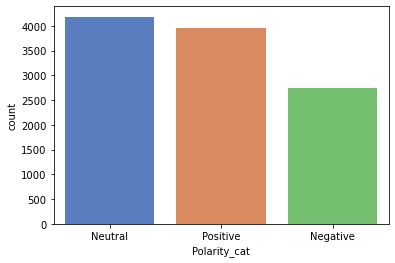

In [56]:
sns.countplot(data=df,x=df['Polarity_cat'],palette='muted');

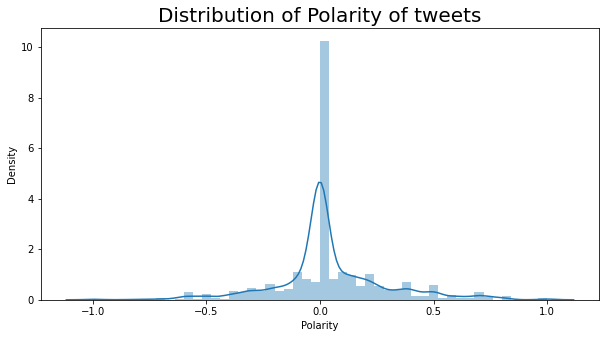

In [57]:
plt.figure(figsize=(10,5))
sns.distplot(df['Polarity']);
plt.title('Distribution of Polarity of tweets', fontsize=20);

In [58]:
df['Polarity'].describe()

count    10889.000000
mean         0.041602
std          0.248535
min         -1.000000
25%         -0.011111
50%          0.000000
75%          0.133333
max          1.000000
Name: Polarity, dtype: float64

In [59]:
print("mean: ",df['Polarity'].mean())
print("median: ",df['Polarity'].median())
print("Skewness: ",df['Polarity'].skew(skipna=True))

mean:  0.04160192449214781
median:  0.0
Skewness:  0.2985448308441364


- Seems like normally distributed but less right skewed since "mean>median>mode"

# EDA

In [60]:
stopwords = set(STOPWORDS)
textt = " ".join(review for review in df.tweet)

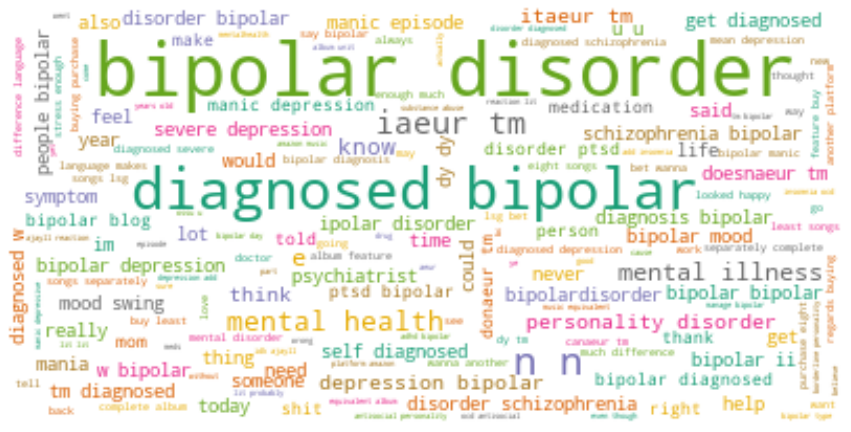

In [61]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      colormap='Dark2').generate(textt)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
#unwanted words removal
df['tweet'] = df['tweet'].str.replace('iaeur','')
df['tweet'] = df['tweet'].str.replace('itaeur','')

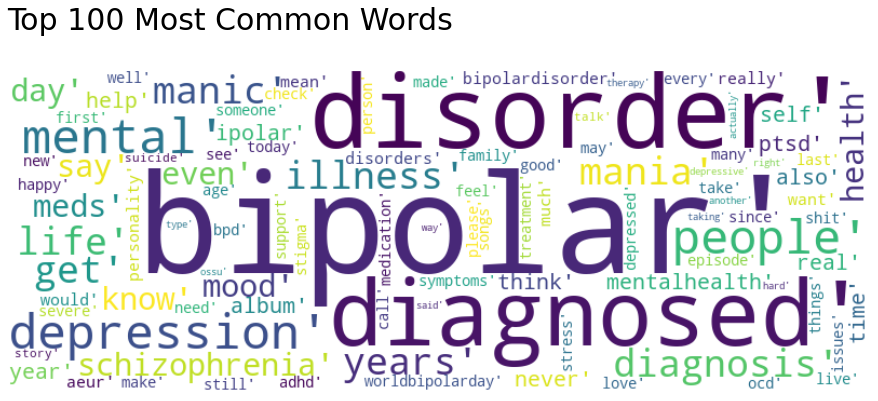

In [63]:
words = [i.split() for i in df['tweet']]
allwords = []
for wordlist in words:
    for word in wordlist:
        if len(word)>2 and word!='like':
            allwords.append(word)

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=800,stopwords=stopwords, height=300, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(12,8), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words \n', fontsize=30,loc='left')
plt.tight_layout(pad=0)
plt.show()

In [64]:
print("Total No. of Unique words in the tweet: ",len(FreqDist(allwords)))

Total No. of Unique words in the tweet:  13121


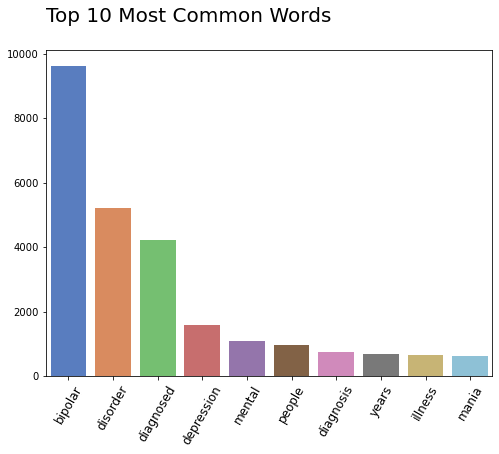

In [65]:
mostcommon_words = {i:j for i,j in mostcommon[:10]}
plt.figure(figsize=(8,6))
sns.barplot(x=list(mostcommon_words.keys()),
            y=list(mostcommon_words.values()),palette='muted');
plt.xticks(rotation=60, fontsize=12);
plt.title('Top 10 Most Common Words \n', fontsize=20,loc='left');

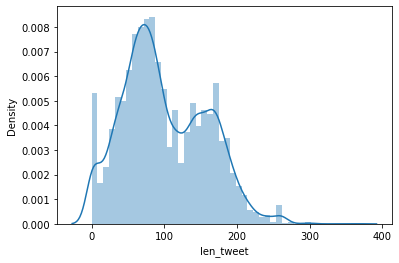

In [66]:
df['len_tweet'] = [len(i) for i in df['tweet']]
sns.distplot(df['len_tweet']);

In [67]:
df['len_tweet'].describe()

count    10889.000000
mean        99.968868
std         57.425002
min          0.000000
25%         58.000000
50%         89.000000
75%        146.000000
max        365.000000
Name: len_tweet, dtype: float64

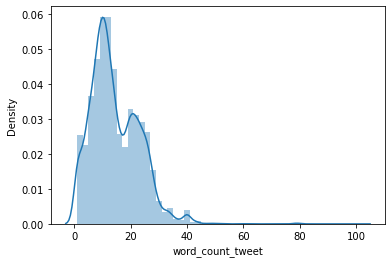

In [68]:
df['word_count_tweet'] = [len(i.split(" ")) for i in df['tweet']]
sns.distplot(df['word_count_tweet']);

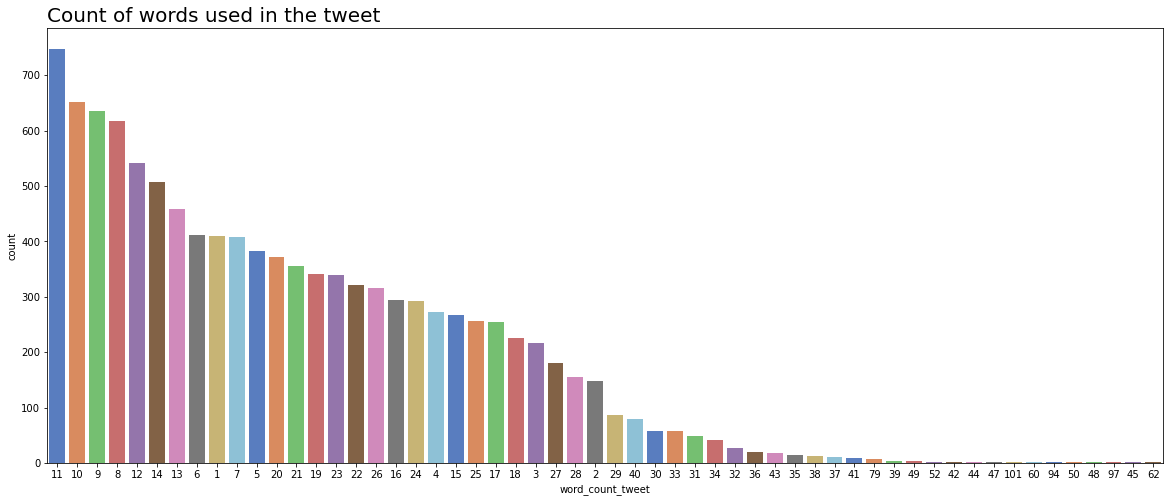

In [69]:
plt.figure(figsize=(20,8))
sns.countplot(df['word_count_tweet'],palette='muted',
              order=list(df['word_count_tweet'].value_counts().index));
plt.title("Count of words used in the tweet",fontdict={'size':20},loc='left');

In [70]:
df['word_count_tweet'].describe()

count    10889.000000
mean        14.403067
std          8.612739
min          1.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        101.000000
Name: word_count_tweet, dtype: float64

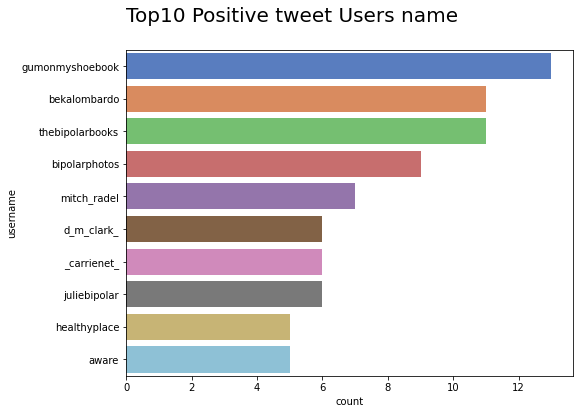

In [71]:
pos = df[df['Polarity_cat']=='Positive'].reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(y= pos[pos['username'].isin(pos['username'].value_counts().head(10).index)]['username'],
             order=list(pos['username'].value_counts().head(10).index),
              palette='muted');
plt.title("Top10 Positive tweet Users name \n",fontdict={'size':20},loc='left');

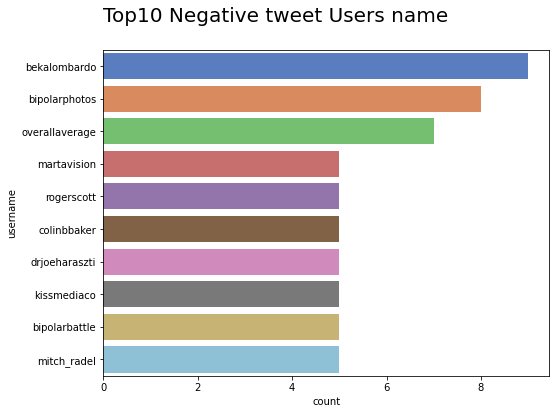

In [72]:
neg = df[df['Polarity_cat']=='Negative'].reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(y= neg[neg['username'].isin(neg['username'].value_counts().head(10).index)]['username'],
             order=list(neg['username'].value_counts().head(10).index),
              palette='muted');
plt.title("Top10 Negative tweet Users name \n",fontdict={'size':20},loc='left');

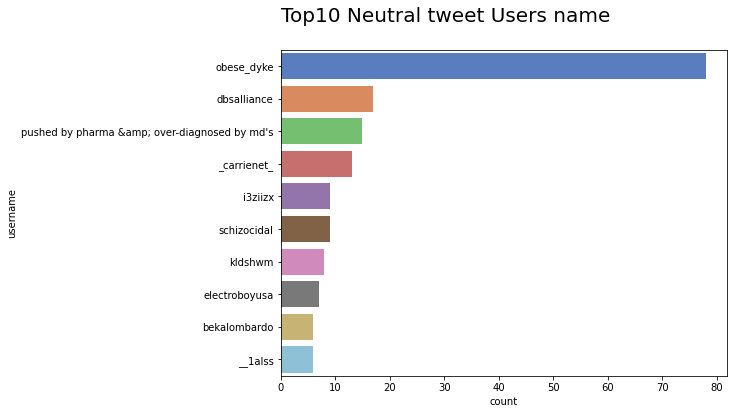

In [73]:
neu = df[df['Polarity_cat']=='Neutral'].reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(y= neu[neu['username'].isin(neu['username'].value_counts().head(10).index)]['username'],
             order=list(neu['username'].value_counts().head(10).index),
              palette='muted');
plt.title("Top10 Neutral tweet Users name \n",fontdict={'size':20},loc='left');

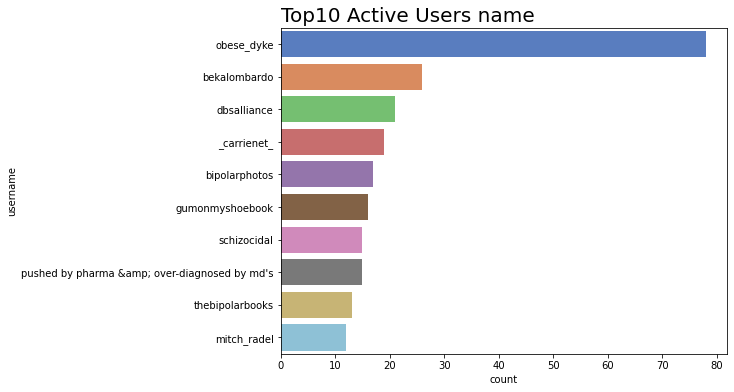

In [74]:
plt.figure(figsize=(8,6))
sns.countplot(y=df[df['username'].isin(df['username'].value_counts().head(10).index)]['username'],
             order=list(df['username'].value_counts().head(10).index),palette='muted');
plt.title("Top10 Active Users name",fontdict={'size':20},loc='left');

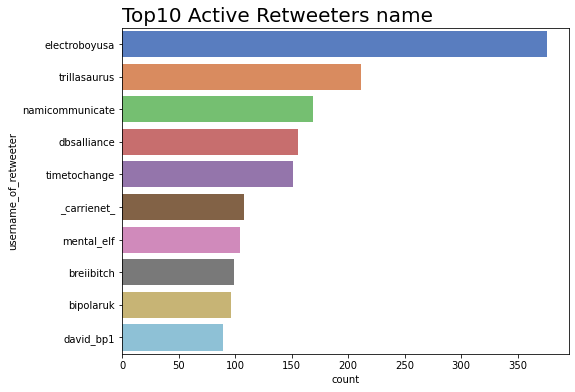

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(y=df[df['username_of_retweeter'].isin(df['username_of_retweeter'].value_counts().head(10).index)]['username_of_retweeter'],
             order=list(df['username_of_retweeter'].value_counts().head(10).index),palette='muted');
plt.title("Top10 Active Retweeters name",fontdict={'size':20},loc='left');

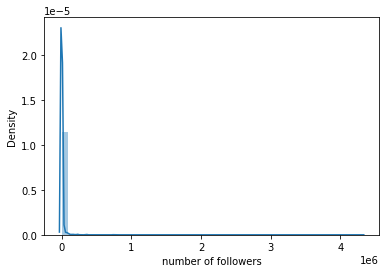

In [76]:
sns.distplot(df['number of followers']);

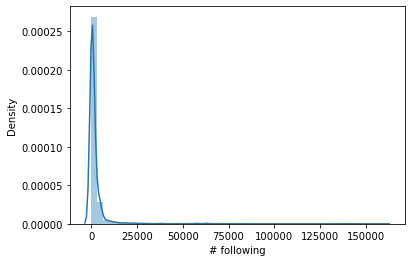

In [77]:
sns.distplot(df['# following']);

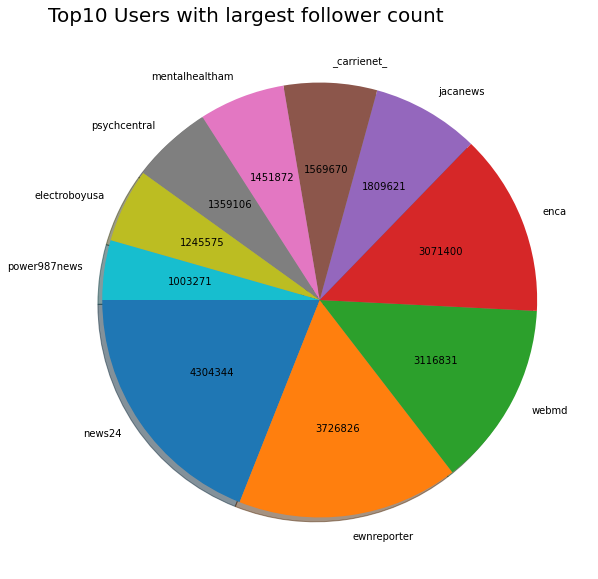

In [78]:
top_foll = df.groupby("username")['number of followers'].sum().reset_index().sort_values('number of followers',
                                                                                         ascending=False).reset_index(drop=True)

plt.figure(figsize=(20,10))
labels = (top_foll['username'].head(10).values)

fracs = list(top_foll['number of followers'].head(10).values)
total = sum(fracs)
plt.pie(fracs,
        labels=labels,
   autopct=lambda p: '{:.0f}'.format(p * total / 100),
   shadow=True, startangle=180)

plt.title("Top10 Users with largest follower count",fontdict={'size':20},loc='left');
plt.show();

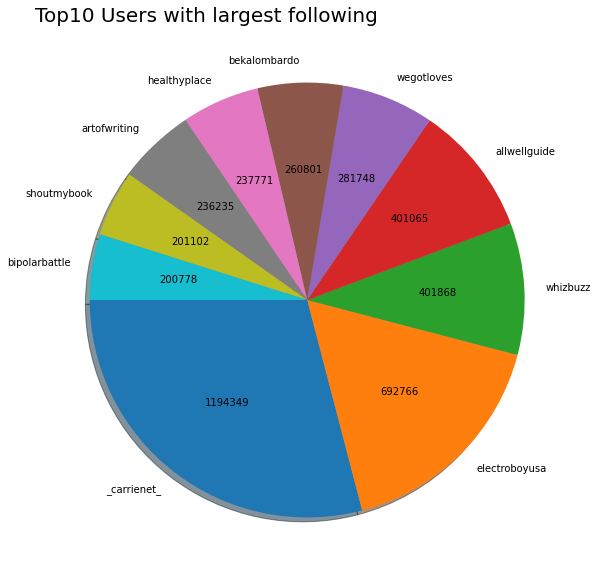

In [79]:
following = df.groupby("username")['# following'].sum().reset_index().sort_values('# following',
                                                                                         ascending=False).reset_index(drop=True)

plt.figure(figsize=(20,10))
labelsf = (following['username'].head(10).values)

fracsf = list(following['# following'].head(10).values)
totalf = sum(fracsf)
plt.pie(fracsf,
        labels=labelsf,
   autopct=lambda p: '{:.0f}'.format(p * totalf / 100),
   shadow=True, startangle=180)

plt.title("Top10 Users with largest following",fontdict={'size':20},loc='left');
plt.show();

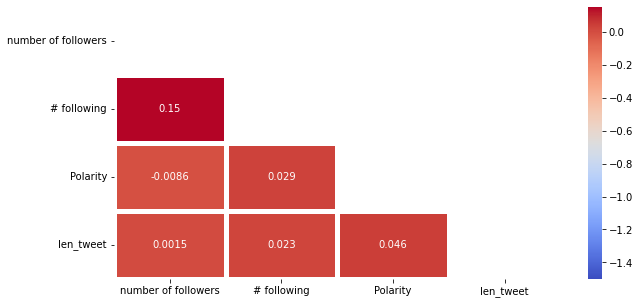

In [80]:
correlation = df[['number of followers','# following', 'Polarity', 'len_tweet']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=5, vmin=-1.5, mask=mask);

# Cleaning labels

In [81]:
print("No. of Unique Label: ",df['label'].nunique())

df['label2'] = [list(set(i)) if type(i) == 'list' else i for i in df['label']]

No. of Unique Label:  112


In [82]:
df = df.reset_index(drop = True)

In [83]:
for i in range(0,len(df['label'])):
    if type(df["label"][i]) != str:
        df = df.drop(i)
len(df['label'])

10885

In [84]:
df['label2'].replace({'UL': 'NULL'}, inplace=True)

In [85]:
df['label'].replace({'NULL': 'null', 'null' "['diagnosed with']": 'diagnosed'}, inplace=True)

In [86]:
df['label2'] = df['label2'].replace('NULL', np.nan)
df['label2'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: label2, dtype: object

In [87]:
df = df[df['label2'].notnull()]
df['label2'].head()

997                                    ['diagnosed with']
998          ['diagnosed with', 'diagnosed with bipolar']
999     ['got diagnosed', 'diagnosed with', 'diagnosed...
1000                                   ['diagnosed with']
1001                                   ['diagnosed with']
Name: label2, dtype: object

In [88]:
def splitlabel(x):
    return ",".join(x[1:-1].split(","))
df["label2"] = df["label"].apply(lambda x: splitlabel(x))
df["label2"]

997                                       'diagnosed with'
998             'diagnosed with', 'diagnosed with bipolar'
999      'got diagnosed', 'diagnosed with', 'diagnosed ...
1000                                      'diagnosed with'
1001                                      'diagnosed with'
1002                                      'diagnosed with'
1003                                      'diagnosed with'
1004                                      'diagnosed with'
1005                                'diagnosed as bipolar'
1006                                'diagnosed as bipolar'
1007                                'diagnosed as bipolar'
1008                                   'diagnosed bipolar'
1009                                   'diagnosed bipolar'
1010                                   'diagnosed bipolar'
1011                                   'diagnosed bipolar'
1012                                   'diagnosed bipolar'
1013                                   'diagnosed bipola

In [89]:
def splitlabel(x):
    return ",".join(x[1:-1].split(","))
df["label2"] = df["label"].apply(lambda x: splitlabel(x))

label = []
for i in df["label2"].unique():
    label = label+i.split(",")
    
from string import punctuation
label = set([i[:].strip()[1:-1] for i in label])

In [90]:
label

{'after diagnosed',
 'after he diagnosed',
 'am diagnosed',
 'being diagnosed',
 'bipolar 1 diagnosis',
 'bipolar diagnosed',
 'bipolar diagnosis',
 'diagnosed as bipolar',
 'diagnosed bipolar',
 'diagnosed bipolar disorder',
 'diagnosed with',
 'diagnosed with bipolar',
 'do not have',
 'first diagnosed',
 'formally diagnosed',
 'getting diagnosed',
 'got diagnosed',
 'have bipolar',
 'i am diagnosed',
 'i am not',
 'i got diagnosed',
 'i have bipolar',
 'never been diagnosed',
 'no bipolar',
 'no diagnosis',
 'not bipolar',
 'not diagnosed',
 'not diagnosed with',
 'officially diagnosed',
 'recently diagnosed'}

In [121]:
positive_cat = ['diagnosed','being diagnosed','have bipolar']
negative_cat = ['not diagnosed','never been diagnosed','not bipolar']

labelf = {}
for i in label:
    for pos in positive_cat:
        if pos in i:
            labelf[i] = pos
        for neg in negative_cat:
            if neg in i:
                labelf[i] = neg
                
labelf['bipolar diagnosis'] = 'bipolar diagnosis'
labelf['bipolar 1 diagnosis'] = 'bipolar 1 diagnosis'
labelf['i am not'] = np.nan
labelf['do not have'] = np.nan
labelf['not bipolar'] = 'not diagnosed'
labelf['no diagnosis'] = 'not diagnosed'
labelf['no bipolar'] = 'not diagnosed'
labelf["not bipolar', 'i am not"] = 'not diagnosed'
labelf["not bipolar', 'i am not', 'i am not"] = 'not diagnosed'
labelf["not bipolar', 'do not have', 'i am not"] = 'not diagnosed'
labelf["i am not', 'i am not"] = np.nan
labelf["not bipolar', 'i am not', 'do not have', 'i am not"] = np.nan
labelf["not diagnosed', 'i am not', 'not diagnosed with"] = 'not diagnosed'
labelf["not bipolar', 'i am not', 'i am not', 'i am not"] = np.nan

In [122]:
labelf

{'diagnosed as bipolar': 'diagnosed',
 'i got diagnosed': 'diagnosed',
 'diagnosed with': 'diagnosed',
 'getting diagnosed': 'diagnosed',
 'not diagnosed': 'not diagnosed',
 'bipolar diagnosed': 'diagnosed',
 'after he diagnosed': 'diagnosed',
 'never been diagnosed': 'never been diagnosed',
 'not diagnosed with': 'not diagnosed',
 'officially diagnosed': 'diagnosed',
 'have bipolar': 'have bipolar',
 'diagnosed with bipolar': 'diagnosed',
 'am diagnosed': 'diagnosed',
 'formally diagnosed': 'diagnosed',
 'i have bipolar': 'have bipolar',
 'after diagnosed': 'diagnosed',
 'recently diagnosed': 'diagnosed',
 'diagnosed bipolar disorder': 'diagnosed',
 'i am diagnosed': 'diagnosed',
 'got diagnosed': 'diagnosed',
 'being diagnosed': 'being diagnosed',
 'diagnosed bipolar': 'diagnosed',
 'not bipolar': 'not diagnosed',
 'first diagnosed': 'diagnosed',
 'bipolar diagnosis': 'bipolar diagnosis',
 'bipolar 1 diagnosis': 'bipolar 1 diagnosis',
 'i am not': nan,
 'do not have': nan,
 'no diagn

In [130]:
labelf["not bipolar', 'i am not', 'do not have"] = np.nan
labelf["i am not', 'i am not', 'i am not', 'i am not', 'i am not"] = np.nan
labelf["i am not', 'i am not', 'i am not"] = np.nan
labelf["not bipolar', 'do not have"] = np.nan

In [132]:
df = df[df['label3'].notnull()]
df['label3'] = df['label3'].astype(str)

In [134]:
df.dropna(subset=['label2'], inplace=True)

In [135]:
for n,i in enumerate(df["label2"]):
    try:
        df.loc[n,"label3"] = labelf[i.split(",")[0].strip(punctuation)]+","+labelf[i.split(",")[1].strip()[1:-1]]
    except:
        df.loc[n,"label3"] = labelf[i[1:-1]]
        
for n,i in enumerate(df["label3"]):
    try:
        df.loc[n,'label3'] = set(sorted(i.split(",")))
    except:
        df.loc[n,"label3"] = i

In [136]:
df.shape

(9888, 14)

In [137]:
df['label3'].unique()

array(['diagnosed', 'bipolar diagnosis', 'bipolar diagnosis,diagnosed',
       'have bipolar', 'diagnosed,bipolar diagnosis',
       'being diagnosed,diagnosed', 'being diagnosed',
       'diagnosed,have bipolar', 'being diagnosed,bipolar diagnosis',
       'have bipolar,diagnosed', 'have bipolar,being diagnosed',
       'diagnosed,being diagnosed', nan, 'not diagnosed',
       'never been diagnosed'], dtype=object)

In [138]:
df.dropna(subset=['label3'], inplace=True)

In [141]:
df['label3'].replace({'have bipolar': 'diagnosed', 'bipolar 1 diagnosis': 'diagnosed', 
                        'bipolar diagnosis': 'diagnosed', 'have bipolar,bipolar diagnosis': 'diagnosed',
                      'have bipolar,have bipolar': 'diagnosed', 'bipolar diagnosis,diagnosed':'diagnosed',
                        'bipolar diagnosis,have bipolar': 'diagnosed', 'being diagnosed,diagnosed': 'diagnosed',
                     'being diagnosed,bipolar diagnosis': 'diagnosed', 'have bipolar,diagnosed':'diagnosed',
                     'have bipolar,being diagnosed':'diagnosed', 'diagnosed,being diagnosed': 'diagnosed',
                     'never been diagnosed':'not diagnosed', 'diagnosed,bipolar diagnosis': 'diagnosed',
                     'being diagnosed':'diagnosed', 'diagnosed,have bipolar': 'diagnosed'},
                    inplace=True)

In [142]:
df['label3'].unique()

array(['diagnosed', 'not diagnosed'], dtype=object)

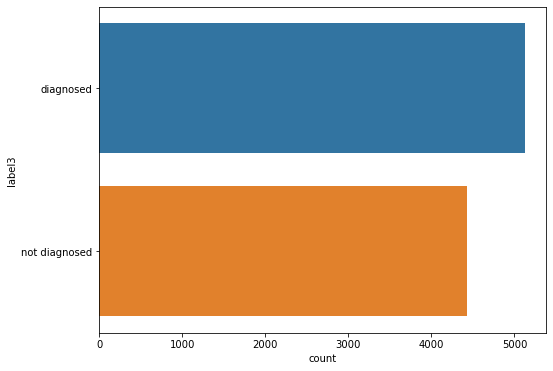

In [143]:
plt.figure(figsize=(8,6))
sns.countplot(y=df["label3"]);

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9546 entries, 997 to 6656
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   username               8051 non-null   object 
 1   tweet                  8051 non-null   object 
 2   username_of_retweeter  8051 non-null   object 
 3   hashtag                8051 non-null   object 
 4   tweet created          8051 non-null   object 
 5   number of followers    8051 non-null   float64
 6   # following            8051 non-null   float64
 7   label                  8051 non-null   object 
 8   Polarity               8051 non-null   float64
 9   Polarity_cat           8051 non-null   object 
 10  len_tweet              8051 non-null   float64
 11  word_count_tweet       8051 non-null   float64
 12  label2                 8051 non-null   object 
 13  label3                 9546 non-null   object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [145]:
df.index = np.arange(0, len(df))
df.head()

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,label,Polarity,Polarity_cat,len_tweet,word_count_tweet,label2,label3
0,obese_dyke,self diagnosed severe depression add insomnia ...,__xlovebri,"[{'text': 'Empire', 'indices': [131, 138]}]",2017-02-01 08:43:02+00:00,54.0,18.0,['diagnosed with'],0.0,Neutral,117.0,14.0,'diagnosed with',diagnosed
1,lidsrodney,diagnosed bipolar getting harassed admin bi,__xlovebri,"[{'text': 'Empire', 'indices': [131, 138]}]",2017-01-31 22:54:50+00:00,5012.0,4678.0,"['diagnosed with', 'diagnosed with bipolar']",0.0,Neutral,43.0,6.0,"'diagnosed with', 'diagnosed with bipolar'",diagnosed
2,xandraris,oh fuck diagnosed bipolar even crazier thought...,__xlovebri,"[{'text': 'Empire', 'indices': [131, 138]}]",2017-01-31 21:36:04+00:00,228.0,779.0,"['got diagnosed', 'diagnosed with', 'diagnosed...",-0.3,Negative,66.0,11.0,"'got diagnosed', 'diagnosed with', 'diagnosed ...",diagnosed
3,djtonythrill,dont care people bipolar til child diagnosed,__xlovebri,"[{'text': 'Empire', 'indices': [131, 138]}]",2017-01-31 21:15:27+00:00,210.0,550.0,['diagnosed with'],0.0,Neutral,44.0,7.0,'diagnosed with',diagnosed
4,blt_rt_bot,ellletstalk two yrs diagnosed w bipolar manic ...,moyetsandy,"[{'text': 'bellletstalk', 'indices': [16, 29]}]",2017-01-31 21:12:12+00:00,218.0,0.0,['diagnosed with'],-0.4,Negative,84.0,13.0,'diagnosed with',diagnosed


# Tweet created

In [146]:
df['tweet created'] = [str(i).split(" ")[0] for i in df['tweet created']]
tweet_dates = df.groupby("tweet created")['tweet'].count().reset_index()
tweet_dates = tweet_dates.set_index('tweet created')

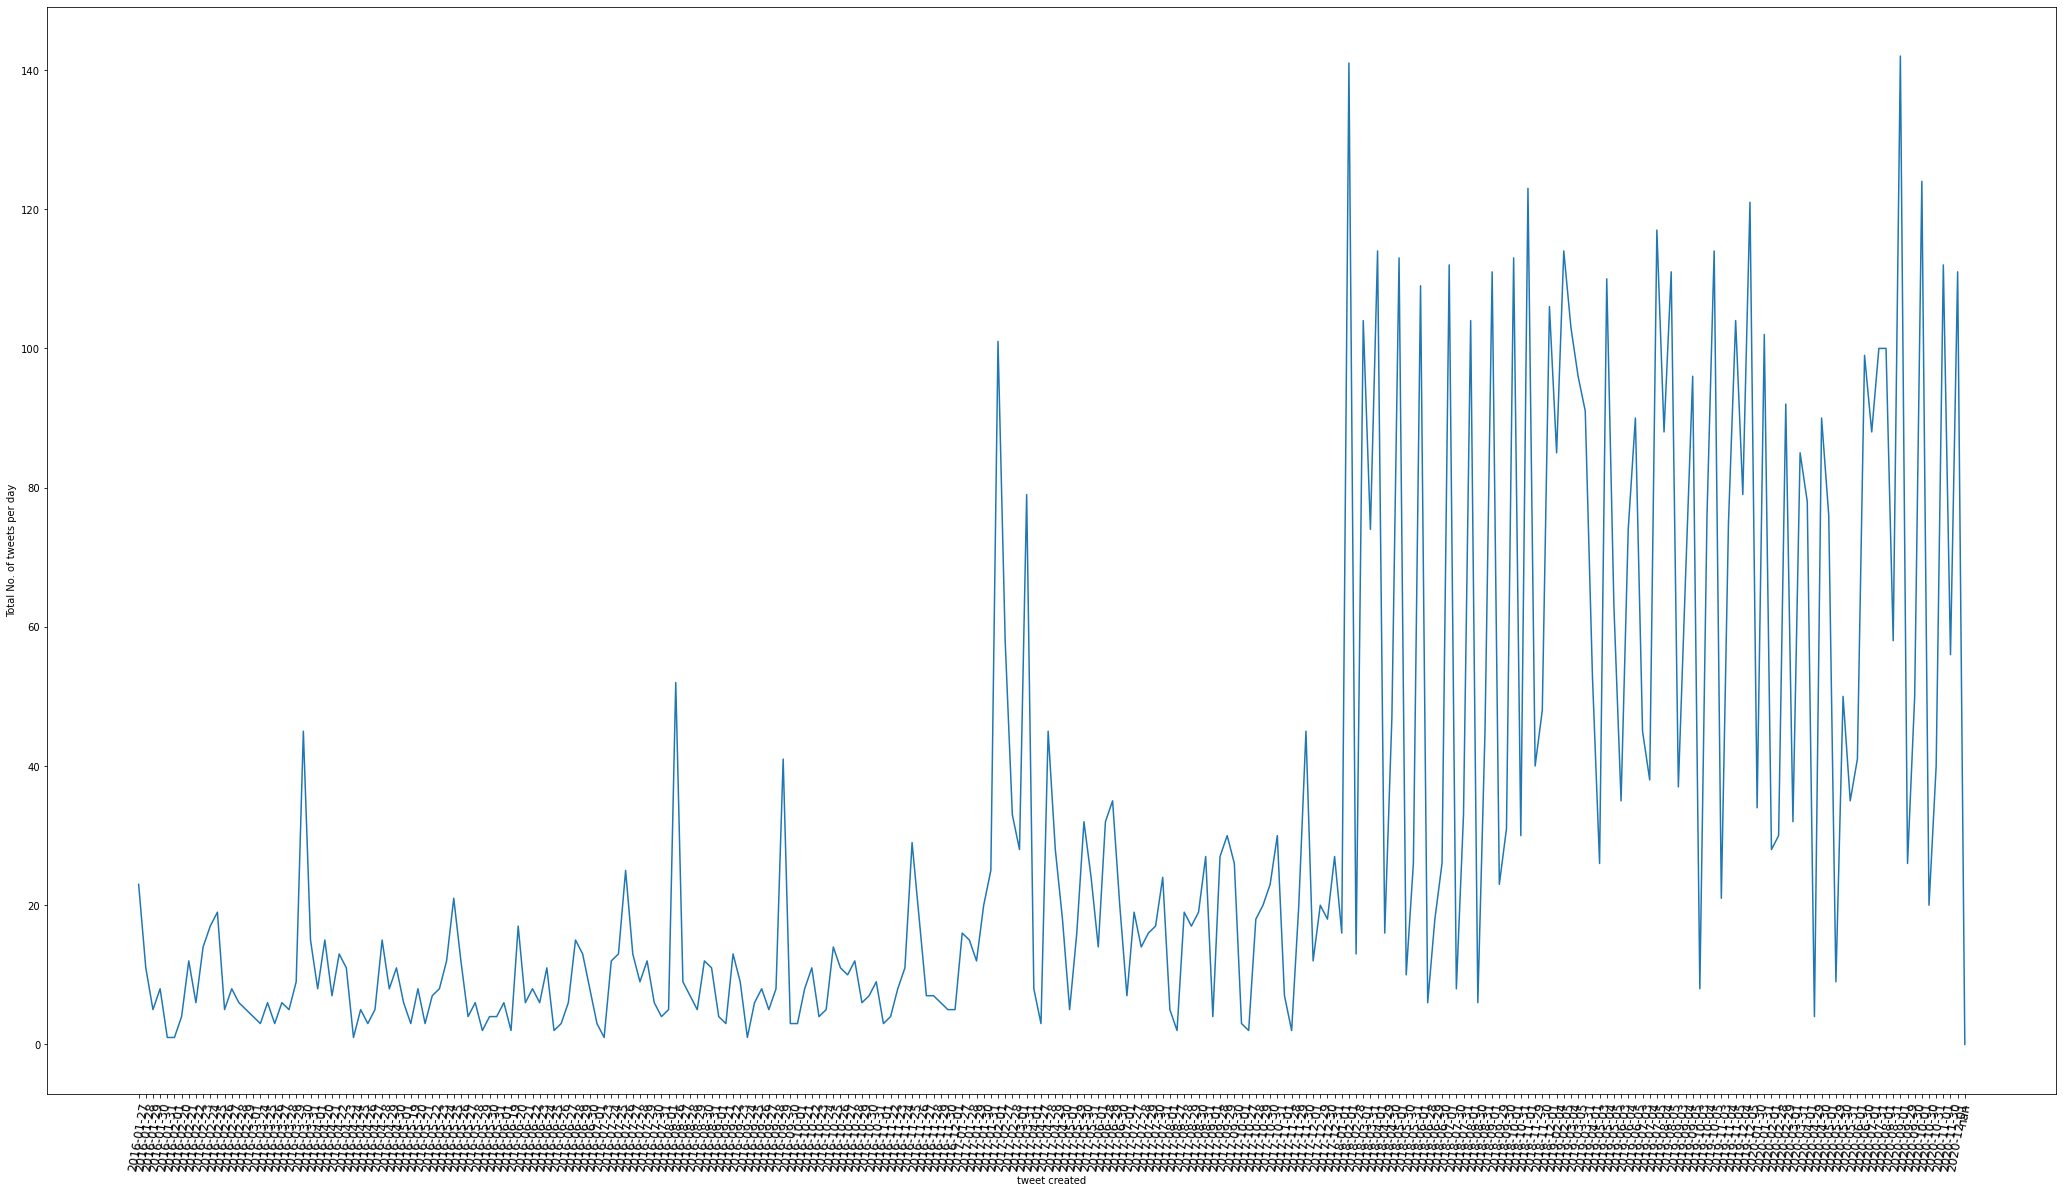

In [147]:
plt.figure(figsize=(36,20))
sns.lineplot(tweet_dates.index,tweet_dates['tweet'],palette='muted');
plt.xticks(rotation=80, fontsize=12);
plt.ylabel("Total No. of tweets per day");

# Hashtags

In [148]:
for i in range(0,len(df['hashtag'])):
    if type(df["hashtag"][i]) != str:
        df = df.drop(i)
len(df['hashtag'])

8051

In [149]:
hashtags = []
for i in df['hashtag']:
    hashtags.append(i[1:-1].split(",")[0].split(":")[-1].lower())

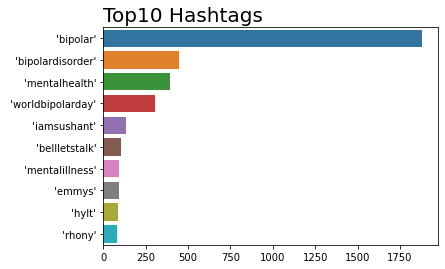

In [150]:
sns.barplot(y=pd.Series(hashtags).value_counts().head(10).index,
            x=pd.Series(hashtags).value_counts().head(10).values);
plt.title("Top10 Hashtags",fontdict={'size':20},loc='left');

# Preparing Data to be modeled in separate notebook

In [151]:
# Saving the cleaned dataframe to csv
df.to_csv('full_clean_data.csv')